In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
data_cleaned = data.copy()
data_cleaned.shape

(1338, 7)

In [9]:
data_cleaned.drop_duplicates( inplace = True)

In [10]:
data_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
data_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [12]:
data_cleaned['sex']=data_cleaned['sex'].map({"male":0,"female":1})

In [13]:
data_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [14]:
data_cleaned['smoker']=data_cleaned['smoker'].map({"yes":1,"no":0})

In [15]:
data_cleaned.rename(columns = {'sex' : 'is_Female' ,'smoker': 'is_smoker'},inplace = True)

In [16]:
data_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [18]:
data_cleaned=pd.get_dummies(data_cleaned,columns=['region'],drop_first=True)

In [19]:
data_cleaned.head()

,age,is_Female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [20]:
data_cleaned=data_cleaned.astype(int)

<Axes: xlabel='bmi', ylabel='Count'>

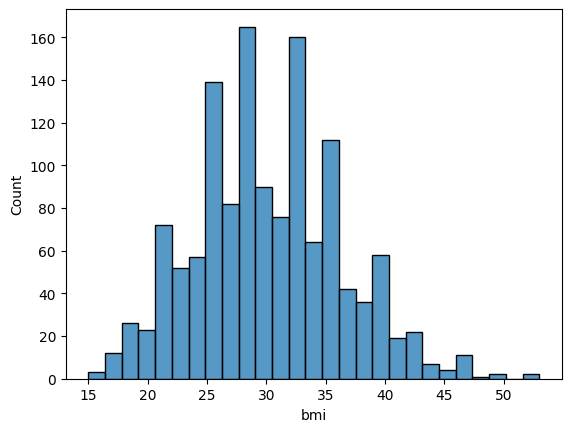

In [21]:
sns.histplot(data_cleaned['bmi'])

In [22]:
data_cleaned['bmi_category'] = pd.cut(
    data_cleaned['bmi'] , 
    bins  = [0,18.5,24.9,29.9, float('inf')],
    labels = ['UnderWeight','Normal','OverWeight','Obese']
)


In [23]:
data_cleaned = pd.get_dummies( data_cleaned , columns=['bmi_category'],drop_first = True)

In [37]:
data_cleaned = data_cleaned.astype(int)
data_cleaned.head()

,age,is_Female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obese
0,-1,1,0,0,1,16884,0,0,1,0,1,0
1,-1,0,0,0,0,1725,0,1,0,0,0,1
2,0,0,0,1,0,4449,0,1,0,0,0,1
3,0,0,-1,0,0,21984,1,0,0,1,0,0
4,0,0,0,0,0,3866,1,0,0,0,1,0


In [28]:
from sklearn.preprocessing import StandardScaler

cols = ['age','bmi','children']   # columns want to scale
scaler = StandardScaler()         # create scaler object

data_cleaned[cols] = scaler.fit_transform(data_cleaned[cols])


In [29]:
from sklearn.model_selection import train_test_split


In [38]:
df=data_cleaned.copy()
df.head()

,age,is_Female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obese
0,-1,1,0,0,1,16884,0,0,1,0,1,0
1,-1,0,0,0,0,1725,0,1,0,0,0,1
2,0,0,0,1,0,4449,0,1,0,0,0,1
3,0,0,-1,0,0,21984,1,0,0,1,0,0
4,0,0,0,0,0,3866,1,0,0,0,1,0


In [32]:
X = df.drop('charges',axis =1)
y = df['charges']


In [33]:
X_train , X_test , y_train , y_test = train_test_split (X,y,test_size = 0.20 , random_state = 42)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False
